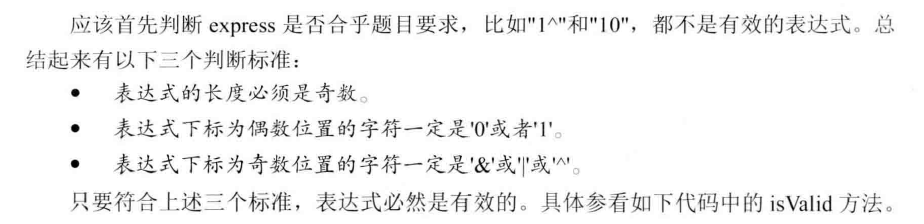

In [1]:
tar = input()

False


In [7]:
exp = input()
desired = False if input()=='false' else True 

def isValid(exp):
    if len(exp) & 1 == 0:
        return False
    for i in range(0,len(exp),2):
        if exp[i] != '1' and exp[i] != '0':
            return False 
    for i in range(1,len(exp), 2):
        if exp[i] != '&' and exp[i] != '|' and exp[i] != '^':
            return False 
    return True

def p(exp, desired, l ,r):
    if l == r:
        if exp[l] == '1':
            return 1 if desired==True else 0
        else:
            return 0 if desired==True else 1
    res = 0
    if desired:
        for i in range(l+1, r, 2):
            if exp[i] == '&':
                res += p(exp, True, l, i-1) * p(exp, True, i+1, r)
                break 
            elif exp[i] == '|':
                res += p(exp, True, l, i-1) * p(exp, False, i+1, r)
                res += p(exp, False, l, i-1) * p(exp, True, i+1, r)
                res += p(exp, True, l, i-1) * p(exp, True, i+1, r)
                break 
            elif exp[i] == '^':
                res += p(exp, True, l, i-1) * p(exp, False, i+1, r)
                res += p(exp, False, l, i-1) * p(exp, True, i+1, r)
                break 
    else:
        for i in range(l+1,r,2):
            if exp[i] == '&':
                res += p(exp, False, l, i-1) * p(exp, True, i+1, r)
                res += p(exp, True, l, i-1) * p(exp, False, i+1, r)
                res += p(exp, False, l, i-1) * p(exp, False, i+1, r)
                break 
            elif exp[i] == '|':
                res += p(exp, False, l, i-1) * p(exp, False, i+1, r)
                break 
            elif exp[i] == '^':
                res += p(exp, True, l, i-1) * p(exp, True, i+1, r)
                res += p(exp, False, l, i-1) * p(exp, False, i+1, r)
                break 
    return res

def num1(exp, desired):
    if exp == None or len(exp)==0:
        return 0
    if not isValid(exp):
        return 0
    return p(exp, desired, 0,len(exp)-1)

ans = num1(exp, desired)
print(ans % 1000000007)

1^0|0|1
false
1


### 没有明白上面为什么没跑通

In [1]:
exp = input()
desired = False if input()=='false' else True 

def isValid(exp):
    if len(exp) & 1 == 0:
        return False
    for i in range(0,len(exp),2):
        if exp[i] != '1' and exp[i] != '0':
            return False 
    for i in range(1,len(exp), 2):
        if exp[i] != '&' and exp[i] != '|' and exp[i] != '^':
            return False 
    return True

def num2(exp, desired):
    if exp == None or len(exp)==0:
        return 0
    if not isValid(exp):
        return 0
    t = []   # t[j][i] 表示exp[j...i]组成true的种树
    for i in range(len(exp)):
        a = [0] * len(exp)
        t.append(a)
    f = []  # f[j][i] 表示exp[j...i]组成true的种树
    for j in range(len(exp)):
        b = [0]*len(exp)
        f.append(b)
    t[0][0] = 0 if exp[0]=='0' else 1
    f[0][0] = 0 if exp[0]=='1' else 1
    for i in range(2,len(exp),2):
        t[i][i] = 0 if exp[i]=='0' else 1
        f[i][i] = 0 if exp[i]=='1' else 1
    for j in range(i-2, -1,-2):
        for k in range(j, i ,2):
            if exp[k+1] =='&':
                t[i][j] += t[j][k] * t[k+2][j]
                f[j][i] += f[j][k] + t[j][k]*f[k+2][i] + f[j][k]+t[k+2][i]
            elif exp[k+1]=='|':
                t[j][i] += (f[j][k] + t[j][k]) * t[k+2][i] + t[j][k] * f[k+2][i]
                f[i][j] += f[j][k] * f[k+2][j]
            else:
                t[j][i] += f[j][k]*t[k+2][i] + t[j][k]* f[k+2][i]
                f[j][i] += f[j][k]*f[k+2][i] + t[j][k] * t[k+2][i]
    return t[0][len(t)-1] if desired else f[0][len(f)-1]

ans = num2(exp, desired)
print(ans % 1000000007)

1^0|0|1
false
1


###  不懂，为什么跑不通！

###  唯一一个之前有跑通的代码

In [2]:
"""
暴力递归转动态规划
"""

ANS = 1000000007

def getResult(string):
    length = len(string)
    true_arrays = [[0] * length for _ in range(length)]
    false_arrays = [[0] * length for _ in range(length)]
    for index in range(0, length, +2):
        if string[index] == "0":
            false_arrays[index][index] = 1
        else:
            true_arrays[index][index] = 1
    for express_length in range(2, length+1, +2):
        for L in range(0, length, +2):
            R = L + express_length
            if R >= length:
                continue
            for op_index in range(L+1, R+1, +2):
                operation = string[op_index]
                left_true = true_arrays[L][op_index - 1]
                right_true = true_arrays[op_index + 1][R]
                left_false = false_arrays[L][op_index - 1]
                right_false = false_arrays[op_index + 1][R]
                if operation == '&':
                    true_arrays[L][R] += left_true * right_true % ANS
                    false_arrays[L][R] += (left_true * right_false + left_false * right_true + left_false * right_false) % ANS
                elif operation == '|':
                    false_arrays[L][R] += left_false * right_false % ANS
                    true_arrays[L][R] += (left_true * right_true + left_true * right_false + left_false * right_true) % ANS
                elif operation == '^':
                    true_arrays[L][R] += (left_false * right_true + left_true * right_false) % ANS
                    false_arrays[L][R] += (left_true * right_true + left_false * right_false) % ANS
                true_arrays[L][R] %= ANS
                false_arrays[L][R] %= ANS
    return true_arrays[0][length - 1], false_arrays[0][length - 1]

string = input()
desired = input()
legal = True
for i in range(0,len(string)):
    if i%2==0 and string[i].isdigit()!=True:
        legal = False
    if i%2!=0 and string[i]!='^' and string[i] != '|' and string [i] != '&':
        legal = False
if legal == False:
    print(0)
else:
    true_counter, faluse_counter = getResult(string)
    if desired == "true":
        print(true_counter)
    else:
        print(faluse_counter)

1^0|0|1
false
2
